# Sarcasm Detection on Airline Reviews

## Business Problem
Understanding customer sentiment is crucial for airlines to improve their services and customer satisfaction. Detecting sarcasm in reviews is particularly challenging but essential, as sarcastic comments can often be misinterpreted as positive feedback. Accurate sarcasm detection helps airlines better understand true customer sentiment and make informed decisions.

## Solution Overview
To address the problem of sarcasm detection, we are developing a Sarcasm detection system.

The solution invloves:

*   Data Collection and Labelling
*   Data Preprocessing
*   Model Training
*   Evaluation










## Dataset Description
The dataset consists of airline reviews collected from various sources. Each review is labeled as sarcastic or non-sarcastic.

- Srcastic (1) - 16548
- Non-Sarcastic (0) - 6623


---



> Class Distribution





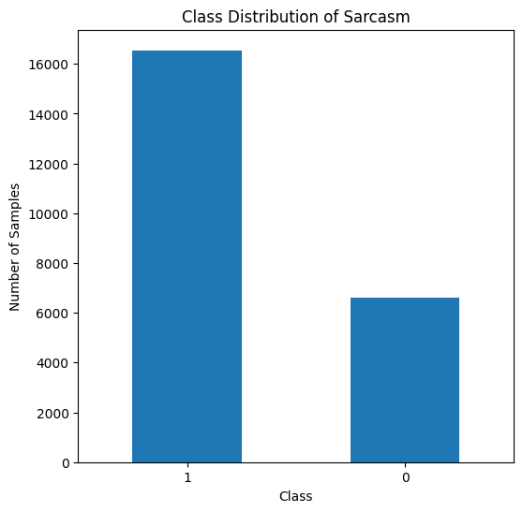



## Distribution of Train and Test Data

The dataset is split into training and testing sets to evaluate the model's performance. Typically, the data is divided as follows:
- Training set: 15947
- Testing set: 4000
---
Training Data Distribution:

- Sarcastic - 11349
- Non-Sarcastic - 4598

Testing Data Distribution:
- Sarcastic - 2900
- Non-Sarcastic - 1100

---

> Training and Testing Data Distribution

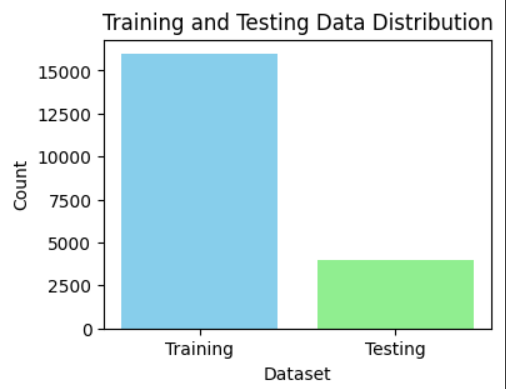



## Data Cleaning
Data cleaning involves several steps, including:
- Removing punctuation and special characters
- Converting text to lowercase
- Removing stopwords
- Removing HTML tags, URLs, metions and hashtags



## Tokenization
* Tokenization is the process of converting text into individual words or tokens.
* For this project, we used a Bert tokenizer which is a sub-word tokenizer.


## BERT Embeddings
* BERT (Bidirectional Encoder Representations from Transformers) embeddings are used to represent the text data.
* BERT provides deep contextualized word representations that capture the meaning of words in different contexts.


## Model Training

Built a BERT-LSTM model with multiple layers to classify sarcasm in airline reviews. The BERT model and tokenizer are loaded from the 'bert-base-uncased' pre-trained model. The LSTM layer (lstm_layer) is defined with 128 units and set to return sequences.

**Input to the Model**

- The model takes tokenized text sequences as input. The sequences are padded or truncated to a maximum length of 128 tokens.

**Model Architecture**

* Input Layer
* BERT Embeddings Layer
* LSTM Layer
* Dropout Layer
* Dense Output Layer

- The model is compiled using the Adam optimizer with a learning rate of 0.001. The loss function used is categorical crossentropy, and the model is evaluated using accuracy.

- EarlyStopping with a patience of 4 to prevent overfitting and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus.

- The model is trained for 20 epochs with a batch size of 32, using 20% of the data for validation. The training process includes the defined callbacks to handle early stopping and learning rate reduction.

- The trained model is saved as an .h5 file for later use.

- The model's accuracy and F1 score are evaluated on the training data.

#Results

Evaluation on the test data is shown through Classification report with metrics like accuracy, recall, precision and F1-score.
Confusion matrix is plotted to have better data analysis.

---

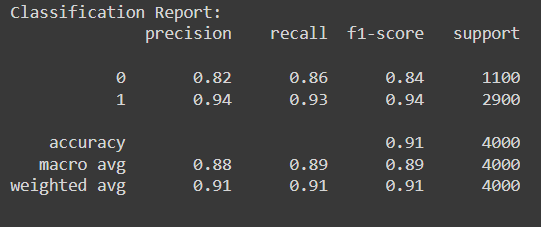

---

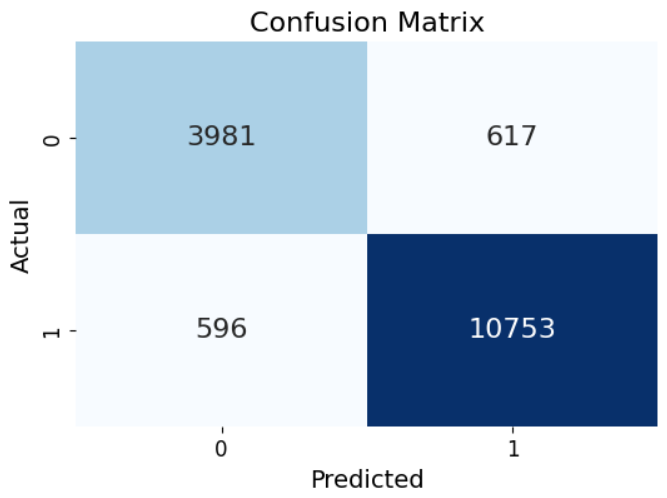

#DEMO


In [23]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from keras.models import load_model, Model
from keras.layers import Input, LSTM, Dense, Dropout, Lambda
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
from keras.utils import to_categorical

def get_bert_embeddings(input_ids):
    attention_mask = tf.where(input_ids != 0, 1, 0)
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state

  # Load BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [24]:
from tensorflow.keras.models import load_model

# Replace 'model.h5' with the path to your .h5 model file
model = load_model('bert_lstm_model.h5')

# Now you can use the loaded model for predictions or further training


The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model_1/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model_1/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_

In [31]:
text = "  My wife and I booked a trip on Expedia. The rate for economy class seemed acceptable although it restricted us to a single carry-on of no more than 8 kilos. At the airport duty free we bought some items and when tried to board we were told that we had to pay 60 extra euros for the duty free bag. When we tried to put the contents into our carry-on they told us that we would still have to pay the 60 euros since our bags would be above the 8 kilos allowed. In the end we had to pay or lose our flight. "

In [32]:
max_len = 128
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # Pad/truncate the tokenized sequence to the max length
    padded_text = tf.keras.preprocessing.sequence.pad_sequences([tokenized_text], maxlen=max_len, padding='post', truncating='post')

    return padded_text

def predict_sarcasm(text, model, tokenizer, max_len):
    # Preprocess the input text
    input_text = preprocess_text(text, tokenizer, max_len)

    # Make a prediction
    prediction = model.predict(input_text)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label (assuming 0: not sarcastic, 1: sarcastic)
    if predicted_class == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"


result = predict_sarcasm(text, model, tokenizer, max_len)
print(f'The input text is: {result}')


1/1 [==============================] - 1s 586ms/step
The input text is: Sarcastic
